In [49]:
# Importing the Libraries

In [121]:
import pandas as pd
import numpy as np

# For visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [51]:
# Read the Data
weather = pd.read_csv('weatherHistory.csv')

In [52]:
# View dimensions of dataset
weather.shape

(96453, 12)

In [53]:
# Look at the data
weather.sample(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
18230,2008-04-08 14:00:00.000 +0200,Overcast,rain,13.888889,13.888889,0.42,6.3273,121.0,10.3523,0.0,1009.88,Mostly cloudy throughout the day.
15422,2007-11-11 15:00:00.000 +0100,Mostly Cloudy,rain,2.788889,-0.844444,0.77,14.3451,162.0,10.8514,0.0,1006.56,Breezy and mostly cloudy overnight.
909,2006-08-16 21:00:00.000 +0200,Mostly Cloudy,rain,21.138889,21.138889,0.60,10.8997,110.0,9.9820,0.0,1012.58,Partly cloudy throughout the day.
24812,2008-11-07 21:00:00.000 +0100,Mostly Cloudy,rain,12.661111,12.661111,0.73,19.9801,138.0,9.9820,0.0,1020.79,Mostly cloudy throughout the day and breezy in...
48589,2011-06-23 13:00:00.000 +0200,Partly Cloudy,rain,30.005556,31.122222,0.50,11.0607,282.0,11.2056,0.0,1015.73,Partly cloudy starting overnight continuing un...


In [54]:
# Information About Dataset
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [55]:
# Handling missing values
weather.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [56]:
weather['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [57]:
weather.fillna('rain', inplace=True)

In [58]:
#Now let's delete 'Daily Summary', we do not need it because we do have 'Summary' feature
weather.drop('Daily Summary', axis=1, inplace=True)

In [59]:
#Handling Dates, Changing Formatted Date from String to Datetime
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], utc=True)

In [60]:
weather['Formatted Date'][0]

Timestamp('2006-03-31 22:00:00+0000', tz='UTC')

In [61]:
weather = weather.sort_values(by='Formatted Date')

In [62]:
weather['year'] = weather['Formatted Date'].dt.year
weather['month'] = weather['Formatted Date'].dt.month_name()
weather['day'] = weather['Formatted Date'].dt.day
weather['day_name'] = weather['Formatted Date'].dt.day_name()

In [63]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'year', 'month', 'day', 'day_name'],
      dtype='object')

In [105]:
# Let's assume this data was collected in Europe.
# select the four climatological seasons as below. I think the most eurpe countries have these seasons time.
# Winter : December to March
# Summer : June to August
# Spring : April to May
# Autumn : September to November

def month2seasons(x):
    if x in [12, 1, 2, 3]:
        season = 'Winter'
    elif x in [6, 7, 8]:
        season = 'Summer'
    elif x in [4, 5]:
        season = 'Spring'
    elif x in [9, 10, 11]:
        season = 'Autumn'
    return season

'Winter'

In [106]:
weather['season'] = weather['Formatted Date'].dt.month.apply(month2seasons)

In [107]:
weather['season'].value_counts()

Winter    32016
Summer    24309
Autumn    24024
Spring    16104
Name: season, dtype: int64

In [109]:
#VISUALIZE
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'year', 'month', 'day', 'day_name', 'season'],
      dtype='object')

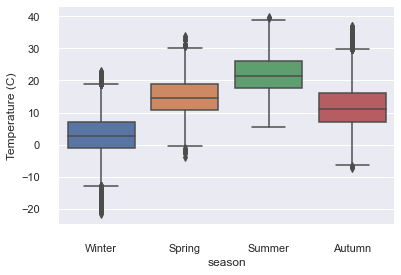

In [122]:
sns.boxplot(x='season', y='Temperature (C)', data=weather)
sns.despine(offset=10, trim=True)

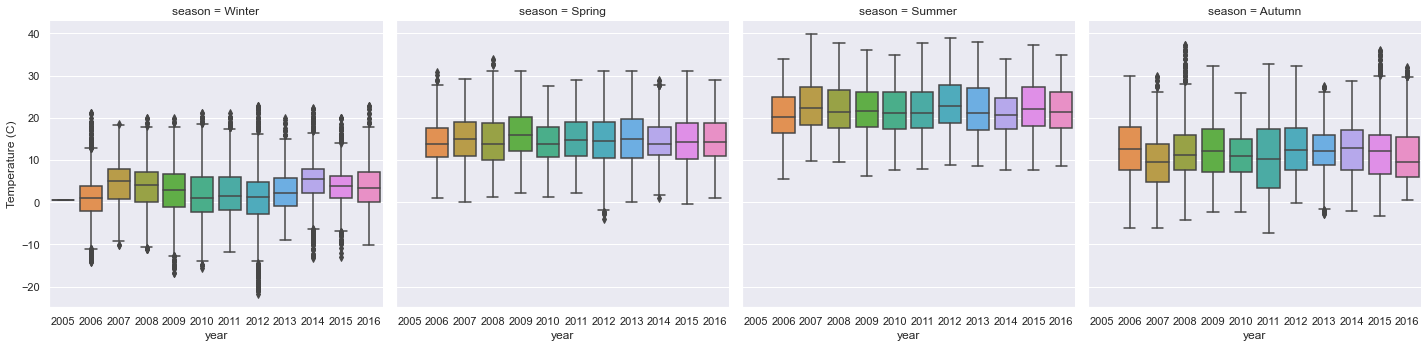

In [123]:
sns.catplot(x='year', y='Temperature (C)', col='season', data=weather, kind='box');

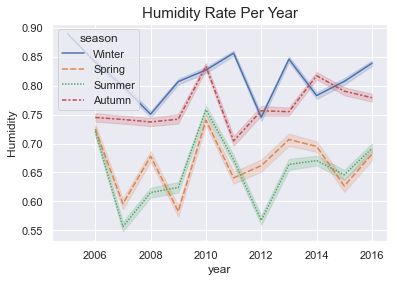

In [132]:
sns.lineplot(x='year', y='Humidity', hue='season', style='season',data=weather);
plt.title("Humidity Rate Per Year", size=15);

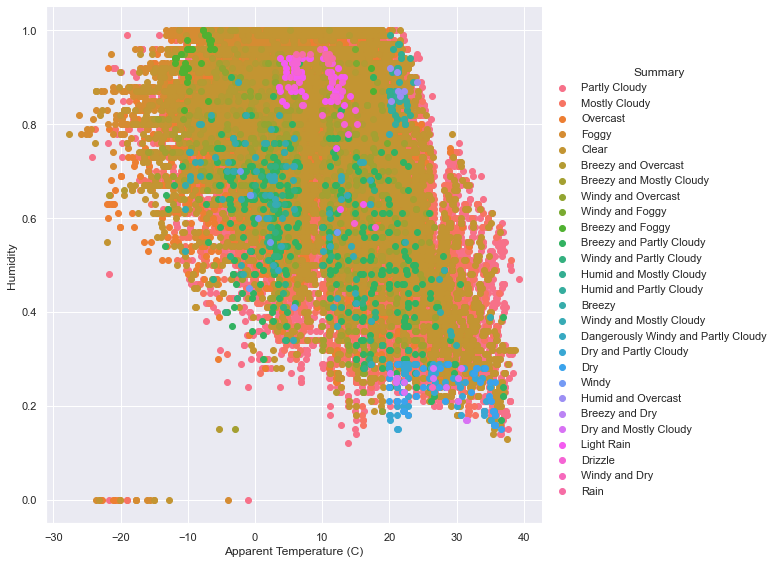

In [134]:
#2D Scatter Plot with Color Coding for each Summary type
sns.FacetGrid(weather, hue="Summary", height=8).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.show()

C:\Users\Elvin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Elvin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Elvin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

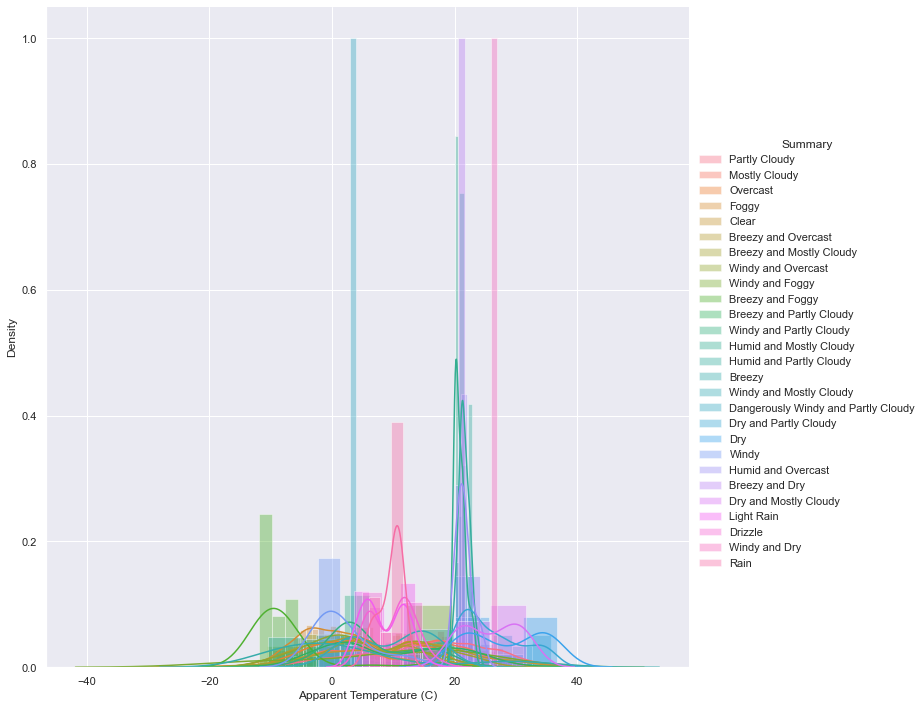

In [135]:
#Univariate Analysis using PDF:
# For Apparent Temperature (C)
sns.FacetGrid(weather, hue="Summary", height=10).map(sns.distplot, "Apparent Temperature (C)").add_legend()
plt.show()